<a href="https://colab.research.google.com/github/jx-dohwan/Aiffel_EGLMS_Project/blob/main/%5BExp_02%5DRegression_with_diabetes%2C_bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Exp-02]Regression with diabetes, bike



## 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자


## 1.데이터 가져오기

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

diabetes = load_diabetes()

In [2]:
df_X = diabetes.data
df_y = diabetes.target

## 2. 모델에 입력할 데이터X 준비하기

In [3]:
# df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.
df_X = np.array(df_X)
df_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

## 3. 모델을 예측할 데이터 y준비하기

In [4]:
# df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.
df_y = np.array(df_y)
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## 4. train과 test로 분리하기

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=7)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(309, 10) (309,)
(133, 10) (133,)


## 5.모델준비하기

In [6]:
# 입력 데이터 개수에 맞는 가중치 W와 b를 준비

W = np.random.rand(10)
b = np.random.rand()
print(W)
print(b)

[0.75250712 0.48272357 0.70392389 0.31842355 0.67872099 0.6196454
 0.35659417 0.6892177  0.09932071 0.74017204]
0.8354460932400068


In [7]:
# 모델 함수를 구현해주세요

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## 6.손실함수 loss 정의하기

In [8]:
# 손실함수를 MSE함수로 정의하기
def MSE(a, b):
    mse = ((a - b) ** 2).mean() 
    return mse

# loss함수 정의하기
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

## 7.기울기를 구하는 gradient함수 구현하기

In [9]:
# 기울기를 계산하는 gradient 함수 구현해보기
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [10]:
dW, db = gradient(X_train, W, b, y_train)
print("dW:", dW)
print("db:", db)

dW: [ -37.09964028   -3.55980595 -124.73478448  -98.87079357  -51.966085
  -48.86175153   98.52683304 -106.68209737 -126.54239599  -82.5855658 ]
db: -303.04314137810036


## 8. 하이퍼파라미터인 학습률 설정하기

In [11]:
# 학습률, learning rate를 설정해주세요
LEARNING_RATE = 0.001

In [12]:
# 만약 학습이 잘되지 않는다면 learning rate 한 번 여러가지로 설정하며 실험해 보세요.
losses = []

for i in range(1, 20000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 21167.0093
Iteration 200 : Loss 15882.1172
Iteration 300 : Loss 12292.5794
Iteration 400 : Loss 9843.4785
Iteration 500 : Loss 8162.5347
Iteration 600 : Loss 6999.8895
Iteration 700 : Loss 6187.7550
Iteration 800 : Loss 5613.3728
Iteration 900 : Loss 5200.8919
Iteration 1000 : Loss 4899.2227
Iteration 1100 : Loss 4673.8953
Iteration 1200 : Loss 4501.6015
Iteration 1300 : Loss 4366.5341
Iteration 1400 : Loss 4257.9331
Iteration 1500 : Loss 4168.4380
Iteration 1600 : Loss 4092.9824
Iteration 1700 : Loss 4028.0516
Iteration 1800 : Loss 3971.1833
Iteration 1900 : Loss 3920.6321
Iteration 2000 : Loss 3875.1426
Iteration 2100 : Loss 3833.7974
Iteration 2200 : Loss 3795.9133
Iteration 2300 : Loss 3760.9711
Iteration 2400 : Loss 3728.5681
Iteration 2500 : Loss 3698.3855
Iteration 2600 : Loss 3670.1654
Iteration 2700 : Loss 3643.6953
Iteration 2800 : Loss 3618.7975
Iteration 2900 : Loss 3595.3207
Iteration 3000 : Loss 3573.1350
Iteration 3100 : Loss 3552.1273
Iteration 3200

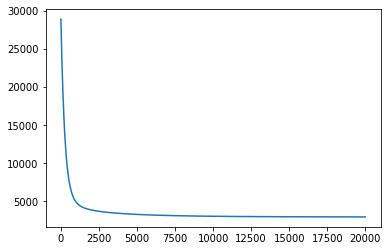

In [13]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

## 9.모델 학습하기

In [14]:
# 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)


## 10.test 데이터에 대한 성능 확인하기

In [15]:
mse

2704.8871727694623

## 11.정답 데이터와 예측한 데이터 시각화하기

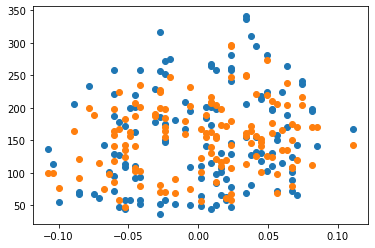

In [16]:
# x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.\
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

## 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## 1. 데이터 가져오기

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Mounted at /content/gdrive


In [19]:
base_path = '/content/gdrive/MyDrive/인공지능/아이펠/ES/data'

In [20]:
train = pd.read_csv(base_path + '/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [22]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [23]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## 2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [24]:
train['datetime'] = train.datetime.apply(pd.to_datetime)

In [25]:
train['year'] = train.datetime.apply(lambda x : x.year)
train['month'] = train.datetime.apply(lambda x : x.month)
train['day'] = train.datetime.apply(lambda x : x.day)
train['hour'] = train.datetime.apply(lambda x : x.hour)
train['minute'] = train.datetime.apply(lambda x : x.minute)
train['second'] = train.datetime.apply(lambda x : x.second)

## 3. year, month, day, hour, minute, second 데이터 개수 시각화하기

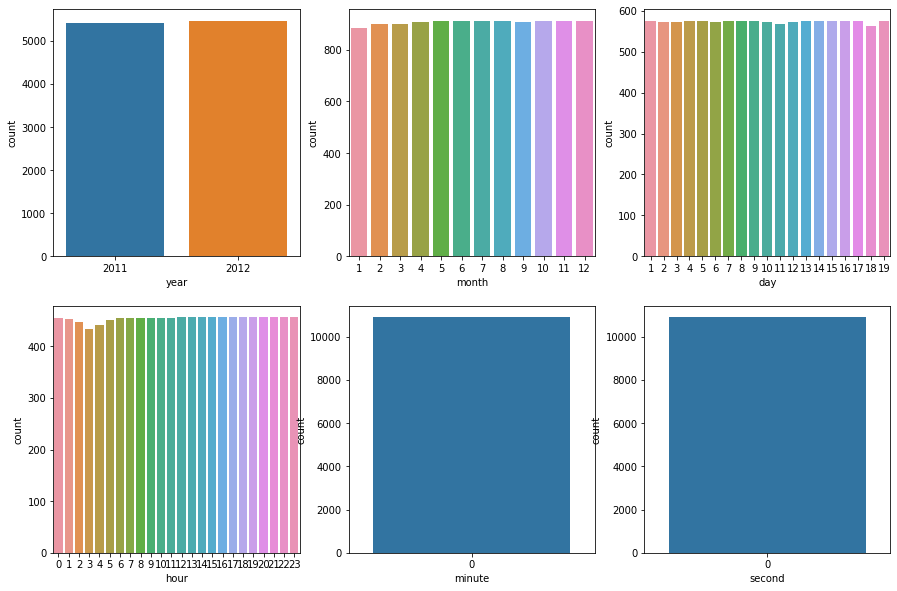

In [26]:
f, ax = plt.subplots(2,3, figsize=(15,10))
sns.countplot(x=train['year'], data=train, ax=ax[0,0])


sns.countplot(x=train['month'], data=train, ax=ax[0,1])


sns.countplot(x=train['day'], data=train, ax=ax[0,2])


sns.countplot(x=train['hour'], data=train, ax=ax[1,0])


sns.countplot(x=train['minute'], data=train, ax=ax[1,1])


sns.countplot(x=train['second'], data=train ,ax=ax[1,2])
plt.show()

## 4. X, y 컬럼 선택 및 train/test 데이터 분리

In [27]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,0.0,0.0
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,0.0,0.0
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,0.0,0.0
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,0.0,0.0
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0


In [28]:
# target값인 count, count를 만든 casual+registered, 중복값이 datetime, 0값으로 무의미한 minute, second를 제거
X = train.drop(['count', 'casual', 'registered','datetime','minute','second'],axis=1, inplace=False)
y = train['count'].values

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

print('X_train : ', X_train.shape, 'X_test : ', X_test.shape)
print('y_train : ', y_train.shape, 'y_test : ',y_test.shape)

X_train :  (8708, 12) X_test :  (2178, 12)
y_train :  (8708,) y_test :  (2178,)


In [30]:
X_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,2.502986,0.028594,0.679605,1.414676,20.254979,23.682855,61.809371,12.747072,2011.502641,6.513436,9.983004,11.532154
std,1.114184,0.166673,0.466655,0.631620,7.796549,8.470709,19.300063,8.190628,0.500022,3.442041,5.499277,6.896168
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,2011.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,2011.000000,4.000000,5.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,2012.000000,7.000000,10.000000,12.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,2012.000000,9.000000,15.000000,17.000000
max,4.000000,1.000000,1.000000,4.000000,39.360000,44.695000,100.000000,56.996900,2012.000000,12.000000,19.000000,23.000000


In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 5871 to 5994
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      8708 non-null   int64  
 1   holiday     8708 non-null   int64  
 2   workingday  8708 non-null   int64  
 3   weather     8708 non-null   int64  
 4   temp        8708 non-null   float64
 5   atemp       8708 non-null   float64
 6   humidity    8708 non-null   int64  
 7   windspeed   8708 non-null   float64
 8   year        8708 non-null   int64  
 9   month       8708 non-null   int64  
 10  day         8708 non-null   int64  
 11  hour        8708 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 884.4 KB


## 5. LinearRegression 모델 학습

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_pred = model.predict(X_test)
MSE =  mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('MSE : {}, RMSE : {}'.format(MSE, RMSE))

MSE : 20111.997729461986, RMSE : 141.81677520470555


## 7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

### temp와 count 예측결과 시각화하기

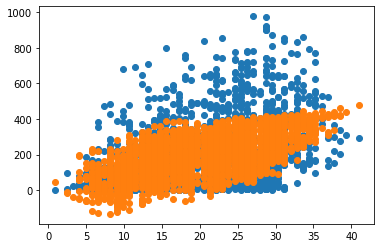

In [34]:
plt.scatter(X_test['temp'], y_test)
plt.scatter(X_test['temp'], y_pred)
plt.show()

### humidity와 count로 예측결과 시각화하기

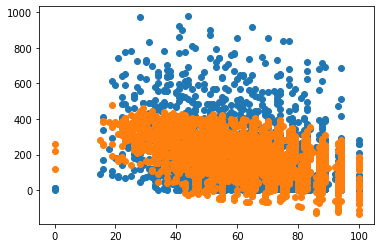

In [35]:
plt.scatter(X_test['humidity'], y_test)
plt.scatter(X_test['humidity'], y_pred )
plt.show()

## 회고
  - 프로젝트 하면서 공부하게 된 점
    - seaborn 의 countplot를 쓸때는 data 인수에는 대상이 되는 데이터프레임을, x 인수에는 데이터프레임의 열 이름 문자열을 넣는다.
  -  inplace=false은 저장 안함, 그리고 True는 저장함을 뜻한다.
  - 하이퍼 파라미터 지정에 따라 값이 달라지는 것을 확인하며 파라미터 지정의 중요성을 알게 되었다.
  

  - error 사항
    - plt.subplots를 사용할때 ax에 2차원 배열이면 그 형식에 맞게 지정해야 하는데 별 생각없이 1차원 배열 형식으로 지정해서 오류가 생겼었다.
    - 예측결과가 너무 정확하게 나옴 그 이유는 casual과 registered를 합한 것이 count였기 때문이다. 
    
  - 평가지표를 맞추기 위해 시도한 것
    - 불필요한 컬럼들을 제거하여 RMSE 값을 맞출 수 있었다.
    
  - 나의 다짐
    - 다음에는 요구사항과 데이터를 자세히 살피고 이해해야겠다. 데이터를 제대로 확인하지 않으니 예상치 못하게 100%에 가까운 정확도를 가져 올바르지 못한 모델을 만들게 되었다.
    